In [2]:
import os
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import itertools
import collections
from scipy import stats
import plot_functions as pf

In [3]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [4]:
frames_df = pd.read_csv('frames8k.csv')

In [10]:
frames_df = frames_df.drop(['unknown_count'],axis=1)

In [12]:
frames_df['all_object_count'] = frames_df['pedestrian_count'] + frames_df['cyclist_count'] + frames_df['vehicle_count']
count_columns = ['cyclist_count', 'pedestrian_count', 'sign_count', 'vehicle_count', 'all_object_count']

In [13]:
frames_df.head()

,Unnamed: 0,cyclist_count,location,pedestrian_count,sign_count,time_of_day,vehicle_count,weather,all_object_count
0,0,0.0,location_sf,44.0,39.0,Day,60.0,sunny,104.0
1,1,1.0,location_sf,40.0,33.0,Day,23.0,sunny,64.0
2,2,8.0,location_sf,27.0,21.0,Day,50.0,sunny,85.0
3,3,0.0,location_sf,4.0,14.0,Day,11.0,sunny,15.0
4,4,0.0,location_sf,0.0,2.0,Day,17.0,sunny,17.0


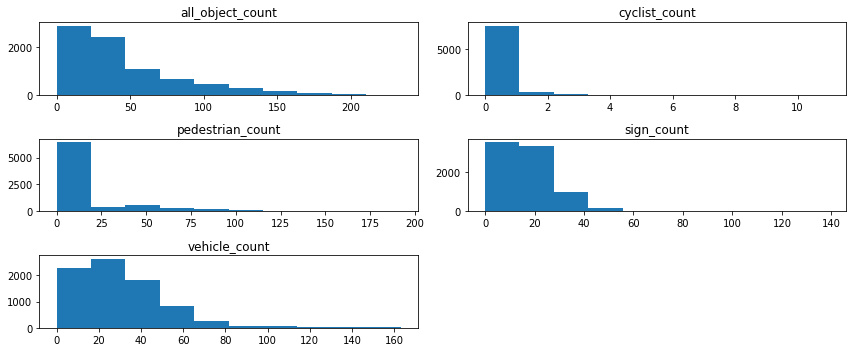

In [14]:
frames_df[count_columns].hist(figsize=(12, 5), grid=False)
plt.tight_layout()

In [27]:
#pf.plot_bar_counts(frames_df, 'weather', 'Unnamed: 0')
#pf.plot_bar_counts(frames_df, 'location', 'Unnamed: 0')
#pf.plot_bar_counts(frames_df, 'time_of_day', 'Unnamed: 0')

In [29]:
frames_df[frames_df['weather'] == 'rain'].shape

(67, 9)

In [15]:
by_location = frames_df.groupby('location').mean().round()
by_location[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count,all_object_count
location,,,,,
location_other,0.0,3.0,18.0,30.0,33.0
location_phx,0.0,2.0,12.0,23.0,26.0
location_sf,0.0,25.0,19.0,36.0,61.0


In [16]:
by_time_of_day = frames_df.groupby('time_of_day').mean().round()
by_time_of_day[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count,all_object_count
time_of_day,,,,,
Dawn/Dusk,0.0,5.0,13.0,27.0,32.0
Day,0.0,16.0,17.0,31.0,47.0
Night,0.0,8.0,16.0,27.0,35.0


In [17]:
by_weather = frames_df.groupby('weather').mean().round()
by_weather[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count,all_object_count
weather,,,,,
rain,0.0,0.0,5.0,19.0,19.0
sunny,0.0,14.0,17.0,31.0,45.0


In [18]:
by_location = frames_df.groupby('location').max()
by_location[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count,all_object_count
location,,,,,
location_other,10.0,40.0,62.0,156.0,158.0
location_phx,4.0,92.0,139.0,163.0,192.0
location_sf,11.0,192.0,64.0,154.0,234.0


In [19]:
by_weather = frames_df.groupby('weather').max()
by_weather[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count,all_object_count
weather,,,,,
rain,0.0,2.0,27.0,106.0,106.0
sunny,11.0,192.0,139.0,163.0,234.0
